# Salary Classification using K-Nearest Neighbors (KNN)

This project aims to classify individuals' income levels (<=50K or >50K) based on various features using the K-Nearest Neighbors (KNN) algorithm.

## 1. Importing the Libraries


In [51]:
import pandas as pd
import numpy as np


## 2. Loading the Dataset

We'll start by loading the dataset and examining its shape and first few rows.


In [52]:
# Load the dataset
dataset = pd.read_csv('salary.csv')

# Display the shape of the datase
dataset.shape

# Display the first few rows of the dataset
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


## 3. Data Preprocessing

### 3.1 Encoding the Target Variable

The target variable `income` will be encoded into binary values, where:
- `<=50K` is encoded as `0`
- `>50K` is encoded as `1`


In [53]:
# Encode the income variable
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

# Display the first few rows after encodi
print(dataset.head)

<bound method NDFrame.head of        age  education.num  capital.gain  hours.per.week  income
0       90              9             0              40       0
1       82              9             0              18       0
2       66             10             0              40       0
3       54              4             0              40       0
4       41             10             0              40       0
...    ...            ...           ...             ...     ...
32556   22             10             0              40       0
32557   27             12             0              38       0
32558   40              9             0              40       1
32559   58              9             0              40       0
32560   22              9             0              20       0

[32561 rows x 5 columns]>


### 3.2 Splitting the Dataset

We will split the dataset into training and testing sets.


In [54]:
# Split the dataset into features (X) and target (y)
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


### 3.3 Feature Scaling

To improve the performance of the model, we will scale the features using `StandardScaler`.


In [55]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## 4. Training the KNN Model

We will train the KNN model and choose the optimal value of K by analyzing the error rate for different K values.


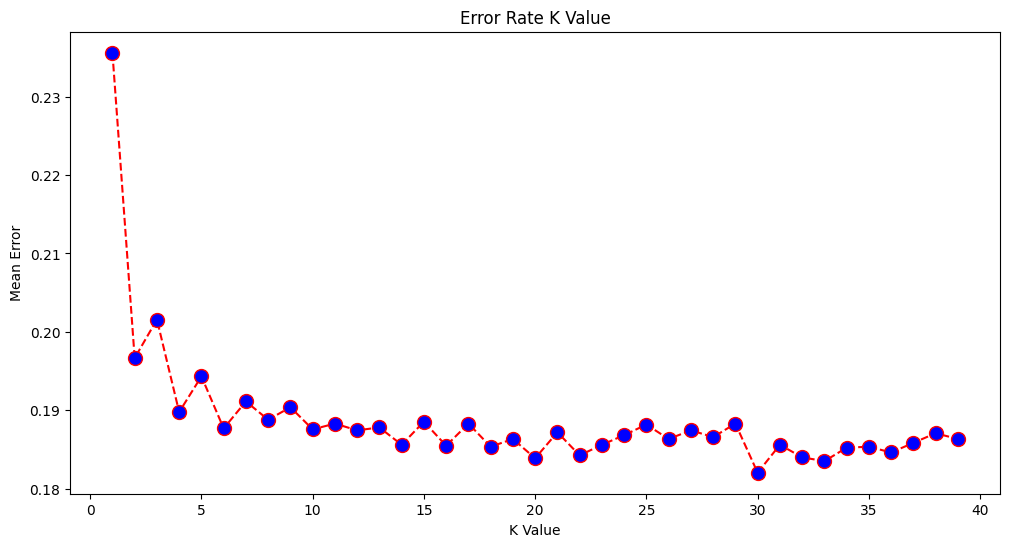

In [56]:
# Initialize the list to store error values
error = []

# Train the KNN model with different K values (1 to 40)
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

# Plot the error rate for different K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

## 5. Making Predictions

Based on the error analysis, we will select the optimal K value and train the final KNN model.


In [57]:
# Train the KNN model with the selected K value
model = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [58]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Display the actual vs predicted results
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## 6. Evaluating the Model

Finally, we will evaluate the accuracy of our model.


In [59]:
from sklearn.metrics import accuracy_score

# Calculate and display the accuracy of the model
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 81.23080702616386%
